# Relatório de Análise VIII

Neste último relatório, nosso objetivo consistirá em remover os **outliers** de nossa base de dados.

## Removendo Outliers

In [2]:
# Importa o numpy com o apelido np
import numpy as np

# Importa o pandas com o apelido pd
import pandas as pd

# Importa o módulo os
import os

# Muda para o diretório com os dados
os.chdir('dados')

# Importa o CSV com os dados de imóveis residenciais
imoveis = pd.read_csv('imoveis-residenciais.csv', sep=';')

# Exibe as cinco primeiras linhas do dataframe
imoveis.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,Apartamento
1,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,22000.0,Casa
2,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,Apartamento
3,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,2301.0,Apartamento
4,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,15803.0,Apartamento


In [3]:
# Importa o pyplot com o apelido plt
from matplotlib import pyplot as plt

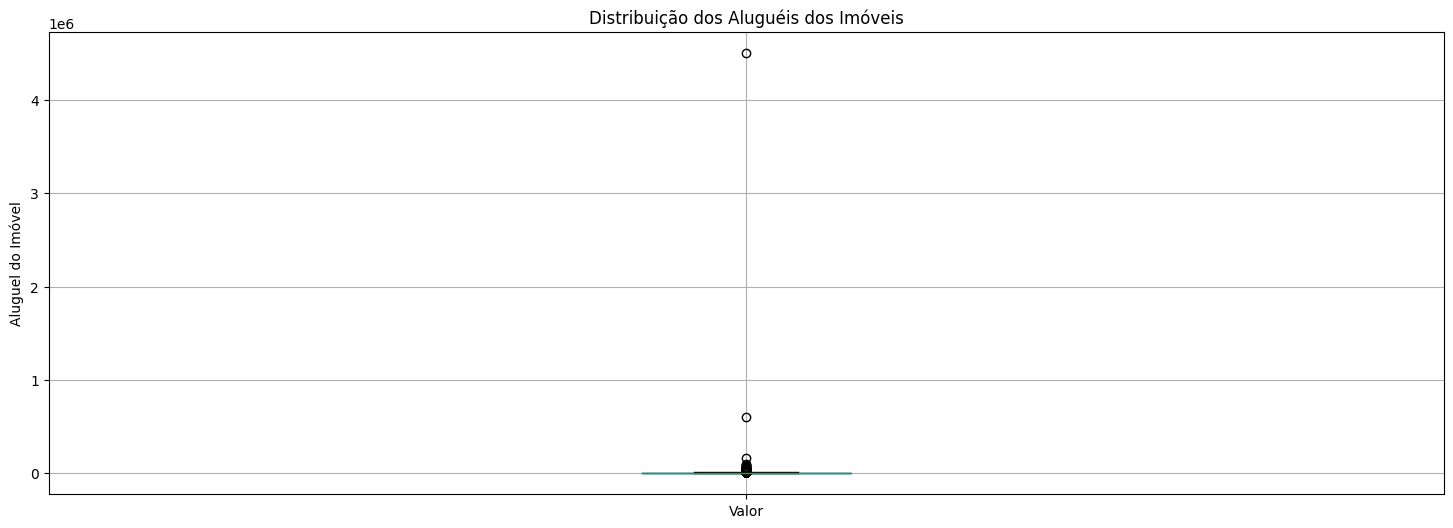

In [4]:
# Cria um box plot para a variável que representa o valor do imóvel
imoveis.boxplot(column='Valor', figsize=(18,6))

# Cria um título para o eixo y
plt.ylabel('Aluguel do Imóvel')

# Cria um título para o gráfico
plt.title('Distribuição dos Aluguéis dos Imóveis')

# Exibe o gráfico
plt.show()

**Observação:**

Existe um *outlier* na variável `Valor` com valor acima de R$ 4.000.000,00. Por isso, a visualização com o boxplot não está tão informativa. Vamos, portanto, remover os outliers.

In [5]:
# Exibe os imóveis cujos aluguéis são superiores a R$ 500.000,00
imoveis[imoveis['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Tipo Agregado
4235,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,601100.0,Apartamento
8674,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,4501100.0,Apartamento


In [6]:
# Obtém uma série com os valores dos imóveis
valores_dos_imoveis = imoveis['Valor']

# Obtém o valor do primeiro quartil
Q1 = valores_dos_imoveis.quantile(.25)

# Obtém o valor do terceiro quartil
Q3 = valores_dos_imoveis.quantile(.75)

# Calcula o intervalo interquartil
IIQ = Q3 - Q1

# Calcula o limite inferior
limite_inferior = Q1 - 1.5 * IIQ

# Calcula o limite superior
limite_superior = Q3 + 1.5 * IIQ

In [7]:
# Filtro para manter somente os valores que estão dentro dos limites
criterios = (valores_dos_imoveis >= limite_inferior) & (valores_dos_imoveis <= limite_superior)

# Filtra os imóveis, mantendo somente aqueles que atendem aos critérios
imoveis = imoveis[criterios]

# Exibe os 10 primeiros imóveis que atendem aos critérios
imoveis.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,Apartamento
2,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,Apartamento
3,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,2301.0,Apartamento
4,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,15803.0,Apartamento
5,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,2436.0,Apartamento
6,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0,2738.0,Apartamento
7,Casa de Condomínio,Barra da Tijuca,4,3,2,466,7500.0,2695.0,0.0,10195.0,Casa
8,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,0.0,2700.0,Apartamento
9,Apartamento,Ipanema,3,1,1,125,7000.0,2100.0,463.0,9563.0,Apartamento
10,Apartamento,Tijuca,1,0,0,48,750.0,772.0,25.0,1547.0,Apartamento


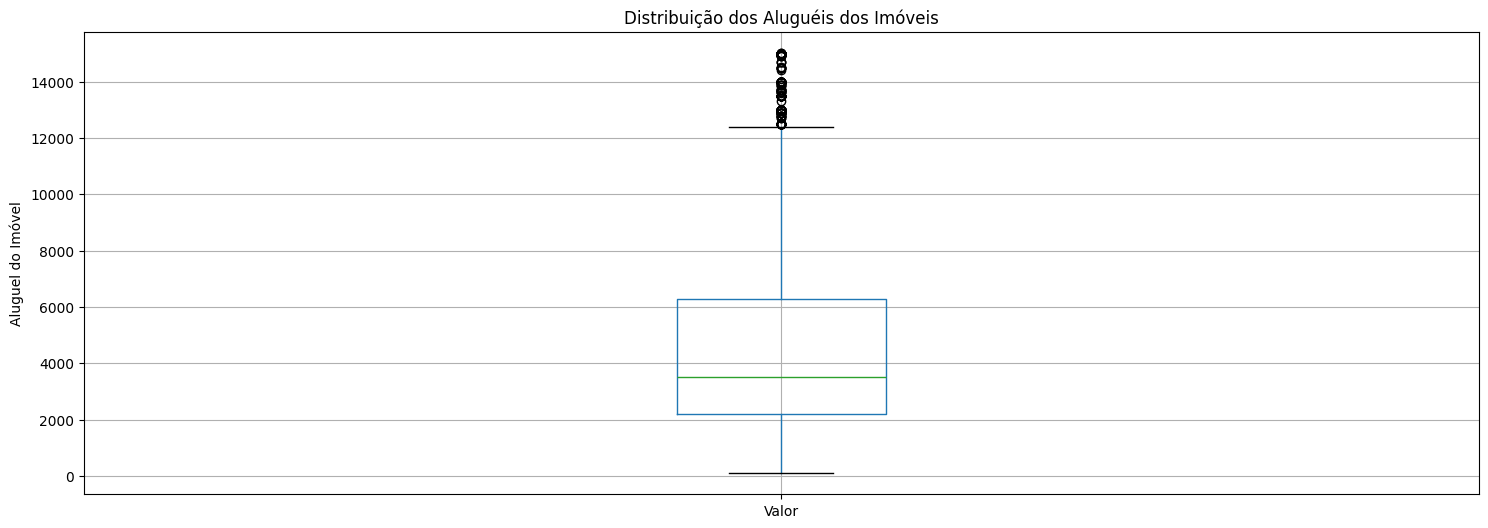

In [8]:
imoveis.boxplot(column='Valor', figsize=(18,6))
plt.title('Distribuição dos Aluguéis dos Imóveis')
plt.ylabel('Aluguel do Imóvel')
plt.show()

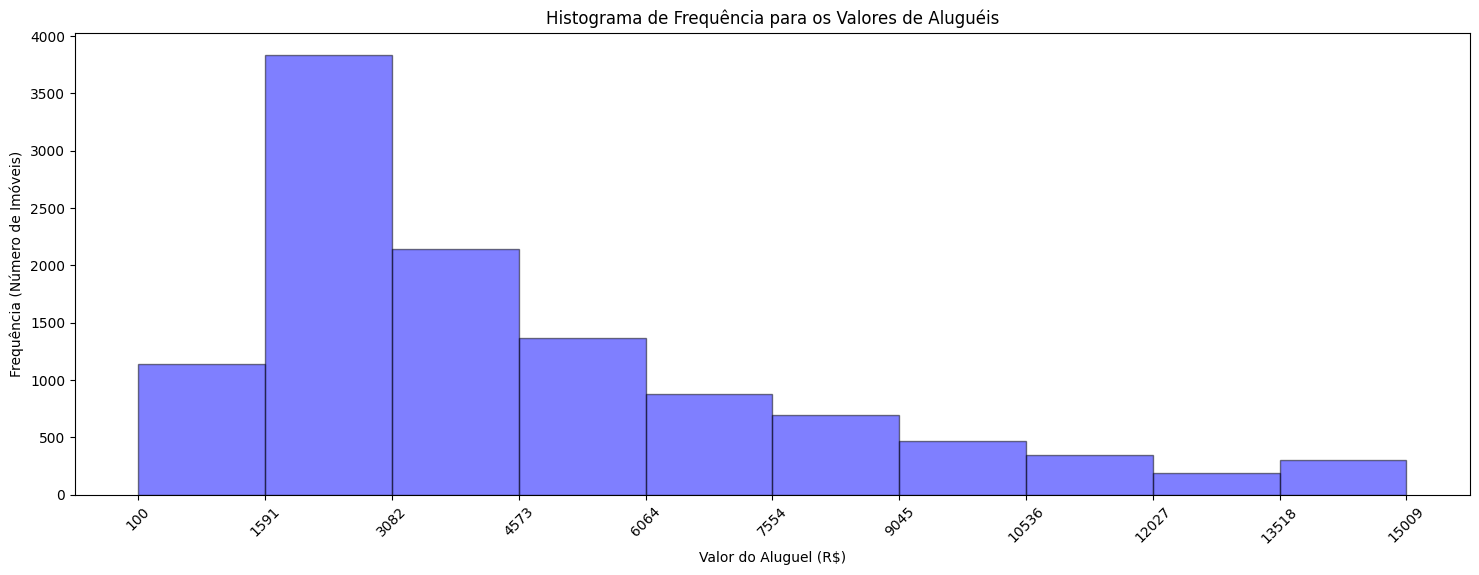

In [9]:
# Obtém as fronteiras das classes do histograma
limites_classes = np.histogram_bin_edges(imoveis['Valor'], bins=10)

# Define um tamanho para a figura
plt.figure(figsize=(18,6))

# Cria um histograma a partir da variável valor do aluguel
plt.hist(x='Valor', bins=limites_classes, data=imoveis, alpha=0.5, color='b', edgecolor='k')

# Define os marcadores do eixo x
plt.xticks(limites_classes, rotation=45)

# Define uma legenda para o eixo x
plt.xlabel('Valor do Aluguel (R$)')

# Define uma legenda para o eixo y
plt.ylabel('Frequência (Número de Imóveis)')

# Define um título para o gráfico
plt.title('Histograma de Frequência para os Valores de Aluguéis')

# Exibe o gráfico
plt.show()

Este histograma mostra uma distribuição assimétrica à direita, significando que há uma concentração maior dos valores de aluguel menores.

In [10]:
# Agrupa os imóveis por tipo
tipos_de_imoveis = imoveis.groupby('Tipo')['Valor']

# Calcula o primeiro quartil 
Q1 = tipos_de_imoveis.quantile(.25)

# Calcula o terceiro quartil 
Q3 = tipos_de_imoveis.quantile(.75)

# Calcula o intervalor interquartil
IIQ = Q3 - Q1

# Calcula o limite inferior
limite_inferior = Q1 - 1.5 * IIQ

# Calcula o limite superior
limite_superior = Q3 + 1.5 * IIQ

In [11]:
Q1

Tipo
Apartamento           2300.0
Casa                  4600.0
Casa de Condomínio    7850.0
Casa de Vila          2200.0
Quitinete             1100.0
Name: Valor, dtype: float64

In [12]:
Q3

Tipo
Apartamento            6000.0
Casa                  10250.0
Casa de Condomínio    12000.0
Casa de Vila           3990.0
Quitinete              1650.0
Name: Valor, dtype: float64

In [13]:
IIQ

Tipo
Apartamento           3700.0
Casa                  5650.0
Casa de Condomínio    4150.0
Casa de Vila          1790.0
Quitinete              550.0
Name: Valor, dtype: float64

In [14]:
limite_inferior

Tipo
Apartamento          -3250.0
Casa                 -3875.0
Casa de Condomínio    1625.0
Casa de Vila          -485.0
Quitinete              275.0
Name: Valor, dtype: float64

In [15]:
limite_superior

Tipo
Apartamento           11550.0
Casa                  18725.0
Casa de Condomínio    18225.0
Casa de Vila           6675.0
Quitinete              2475.0
Name: Valor, dtype: float64

In [16]:
# Dataframe vazio
imoveis_atualizados = pd.DataFrame()

for tipo_de_imovel in tipos_de_imoveis.groups.keys():
    # Critério 1: O tipo do imóvel é igual ao tipo do imóvel desta iteração?
    criterio1 = imoveis['Tipo'] == tipo_de_imovel
    
    # Critério 2: O valor do aluguel está entre os limites?
    criterio2 = (imoveis['Valor'] >= limite_inferior[tipo_de_imovel]) & (imoveis['Valor'] <= limite_superior[tipo_de_imovel])
    
    # Filtro
    filtro = criterio1 & criterio2
    
    # Dataframe filtrado
    imoveis_filtrados = imoveis[filtro]
    
    # Concatena os dois dataframes
    imoveis_atualizados = pd.concat([imoveis_atualizados, imoveis_filtrados])

In [17]:
imoveis_atualizados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Tipo Agregado
2,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,2611.0,Apartamento
5,Apartamento,Barra da Tijuca,2,1,1,67,1700.0,589.0,147.0,2436.0,Apartamento
6,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0,2738.0,Apartamento
8,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,0.0,2700.0,Apartamento
9,Apartamento,Ipanema,3,1,1,125,7000.0,2100.0,463.0,9563.0,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
12001,Quitinete,Copacabana,1,0,0,36,1600.0,610.0,54.0,2264.0,Apartamento
12123,Quitinete,Leblon,1,0,0,32,2400.0,715.0,121.0,3236.0,Apartamento
12141,Quitinete,Copacabana,1,0,0,32,1600.0,692.0,0.0,2292.0,Apartamento
12164,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,1505.0,Apartamento


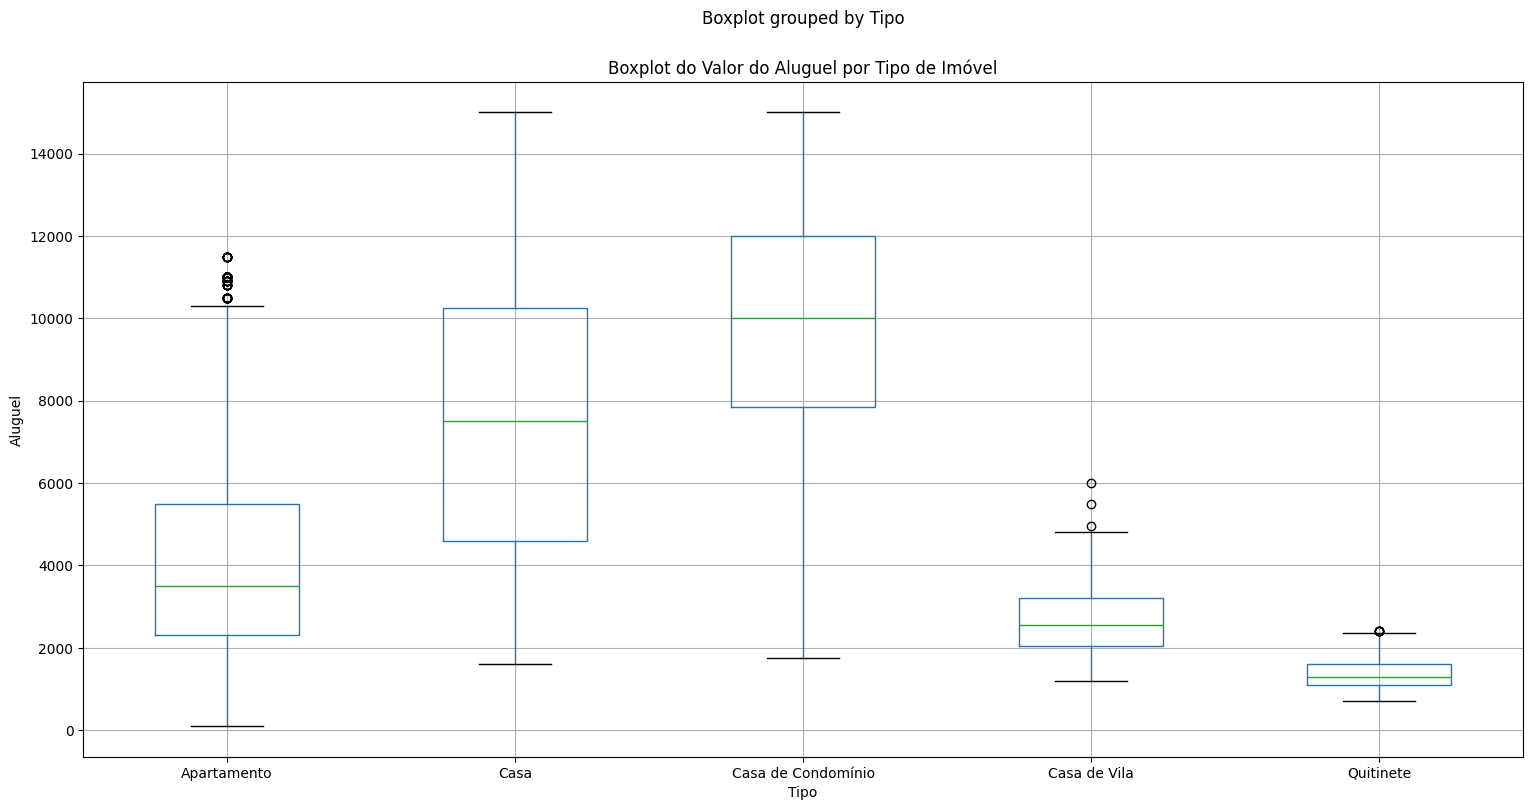

In [18]:
imoveis_atualizados.boxplot(column='Valor', by='Tipo', figsize=(18,9))

# Título do gráfico
plt.title('Boxplot do Valor do Aluguel por Tipo de Imóvel')

# Título do eixo y
plt.ylabel('Aluguel')

# Exibe o gráfico
plt.show()

In [19]:
# Exporta o dataframe atualizados
imoveis_atualizados.to_csv('imoveis-residenciais.csv', sep=';', index=False)